In [1]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from utils.text_datasets import get_basic_tweet_sentiment_dataset, get_poem_sentiment_dataset, get_advanced_tweet_sentiment_dataset_only_text
from typing import Callable
from utils.text_datasets import SimpleSentimentDataset
from utils.metrics import display_clasification_metrics
import matplotlib.pyplot as plt

def tokenize_function(examples):
    review_tokenized = []
    all_parsed = 0
    unknows = 0
    for word in examples.split():
        all_parsed += 1
        try:
            review_tokenized.append(tokenizer[word.lower()])
        except:
            unknows += 1
    return review_tokenized

In [43]:
# 5 (dokumentacja), 3 (test_dataset), lub 2 (train_dataset) klasy
train_dataset, test_dataset = get_basic_tweet_sentiment_dataset(
    tokenize_function
)
SENTIMENT_MODE = "024"
classes = [0, 1, 2, 3, 4]

In [38]:
# 4 (train), 3 (test) klasy
train_dataset, validation_dataset, test_dataset = get_poem_sentiment_dataset(
    tokenize_function
)
SENTIMENT_MODE = "012"
classes = [0, 1, 2, 3]

In [ ]:
# 3 klasy
train_dataset, test_dataset = get_advanced_tweet_sentiment_dataset_only_text(tokenize_function)
SENTIMENT_MODE = "012"
classes = [0, 1, 2]

In [3]:
nltk.download("vader_lexicon")

# ======= Funkcje analizy sentymentu =======
def analyze_with_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def analyze_with_vader(text, vader_analyzer):
    scores = vader_analyzer.polarity_scores(text)
    return scores["compound"]

vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/szczygiel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
def get_vader_and_tb_scores(dataset: SimpleSentimentDataset, sentiment_func: Callable[[float], int]):
    vader_list = []
    tb_list = []
    dataset_size = len(dataset)
    for i in range(dataset_size):
        text = dataset.text[i]
        if not isinstance(text, str):
            continue
        tb_score = analyze_with_textblob(text)
        vader_score = analyze_with_vader(text, vader)
        tb_list.append(sentiment_func(tb_score))
        vader_list.append(sentiment_func(vader_score))
    return tb_list, vader_list

def get_sentiment_5(score):
    thresholds = [-0.6, -0.2, 0.2, 0.6]
    for i, threshold in enumerate(thresholds):
        if score < threshold:
            return i
    return len(thresholds)

def get_sentiment_4(score):
    thresholds = [-0.5, 0.0, 0.5]
    for i, threshold in enumerate(thresholds):
        if score < threshold:
            return i
    return len(thresholds)

def get_sentiment_3(score):
    if SENTIMENT_MODE == "024":
        if score < -0.33:
            return 0
        elif score < 0.33:
            return 2
        else:
            return 4
    else:
        if score < -0.33:
            return 0
        elif score < 0.33:
            return 1
        else:
            return 2
    
def get_sentiment_2(score):
    if score < 0:
        return 0
    else:
        return 4

def get_analysis(dataset: SimpleSentimentDataset, sentiment_func: Callable[[float], int], labels = None):
    tb_scores, vader_scores = get_vader_and_tb_scores(dataset, sentiment_func)
    print("TEXTBLOB")
    display_clasification_metrics(tb_scores, dataset.sentiment, labels=labels, rule_based=True)
    plt.figure()

    print("VADER")
    display_clasification_metrics(vader_scores, dataset.sentiment, labels=labels, rule_based=True)
    plt.figure()

## Podział na 5 klas

In [44]:
get_analysis(train_dataset, get_sentiment_5)

KeyboardInterrupt: 

TEXTBLOB
F1 Score 0.23783822108780234
Accuracy 0.3634538152610442
Recall 0.23824495627934233
VADER
F1 Score 0.3303008725530087
Accuracy 0.46586345381526106
Recall 0.2902436181060739


/home/szczygiel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/szczygiel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


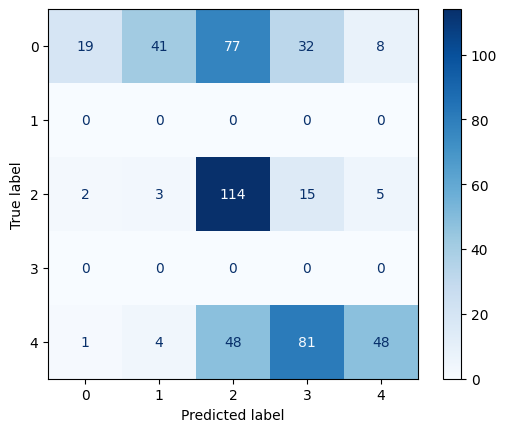

<Figure size 640x480 with 0 Axes>

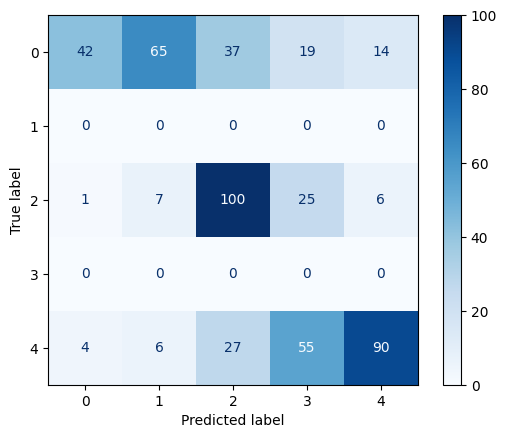

<Figure size 640x480 with 0 Axes>

In [45]:
get_analysis(test_dataset, get_sentiment_5)

## Podział na 4 klasy

TEXTBLOB
F1 Score 0.24979163715942226
Accuracy 0.5336322869955157
Recall 0.2649477099149668
VADER
F1 Score 0.36880596255596254
Accuracy 0.6098654708520179
Recall 0.3775949089313145


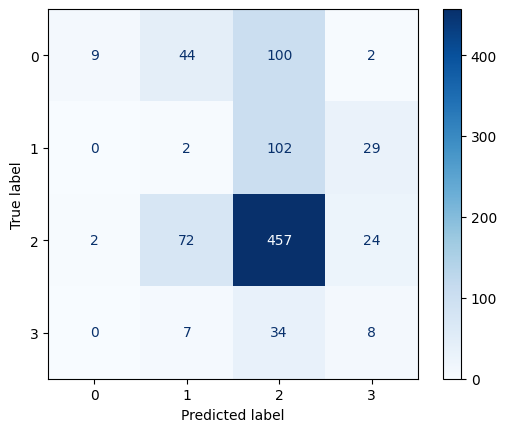

<Figure size 640x480 with 0 Axes>

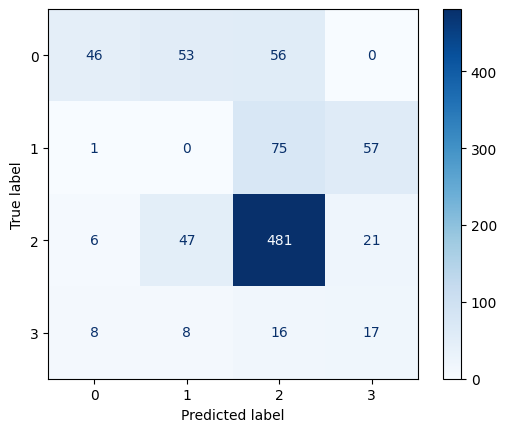

<Figure size 640x480 with 0 Axes>

In [39]:
get_analysis(train_dataset, get_sentiment_4)

TEXTBLOB
F1 Score 0.2611633372502938
Accuracy 0.5865384615384616
Recall 0.2496186117467582
VADER
F1 Score 0.3414351851851852
Accuracy 0.6538461538461539
Recall 0.3131197559115179


/home/szczygiel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/szczygiel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


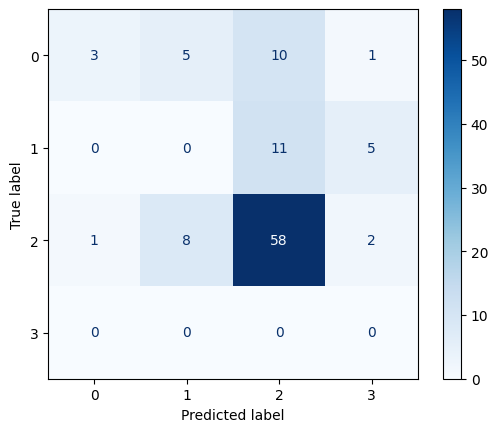

<Figure size 640x480 with 0 Axes>

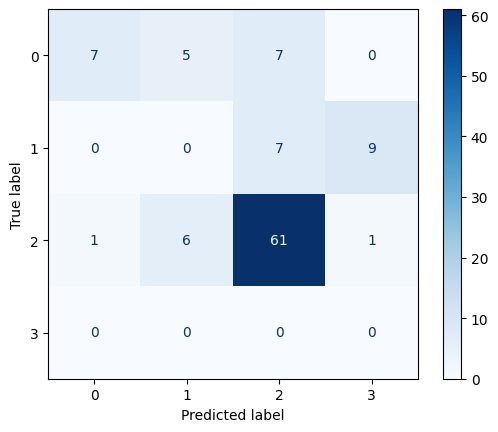

<Figure size 640x480 with 0 Axes>

In [40]:
get_analysis(test_dataset, get_sentiment_4)

## Podział na 3 klasy

TEXTBLOB
F1 Score 0.13662112059266376
Accuracy 0.16367713004484305
Recall 0.2197053225915705
VADER
F1 Score 0.23035903469949495
Accuracy 0.22085201793721973
Recall 0.2526638086060837


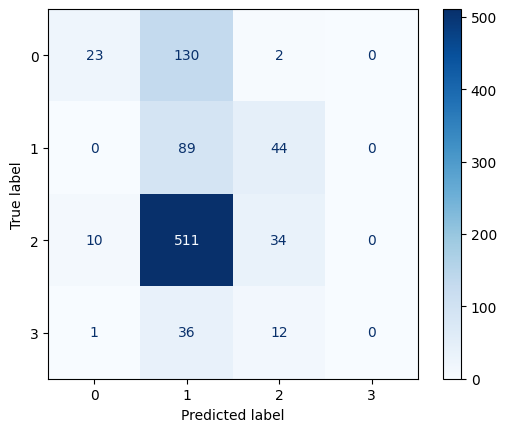

<Figure size 640x480 with 0 Axes>

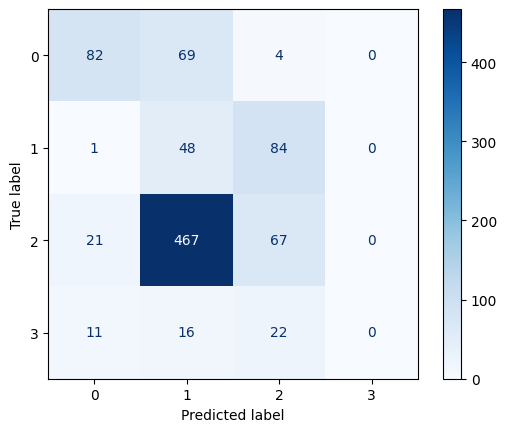

<Figure size 640x480 with 0 Axes>

In [41]:
get_analysis(train_dataset, get_sentiment_3)

TEXTBLOB
F1 Score 0.5359834169357979
Accuracy 0.5481927710843374
Recall 0.5704729567063428
VADER
F1 Score 0.7007087171995319
Accuracy 0.7028112449799196
Recall 0.7085748797125458


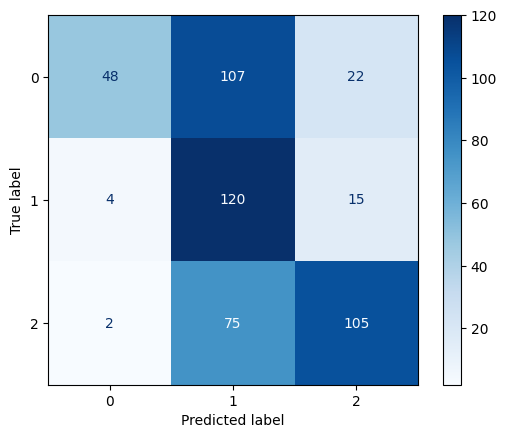

<Figure size 640x480 with 0 Axes>

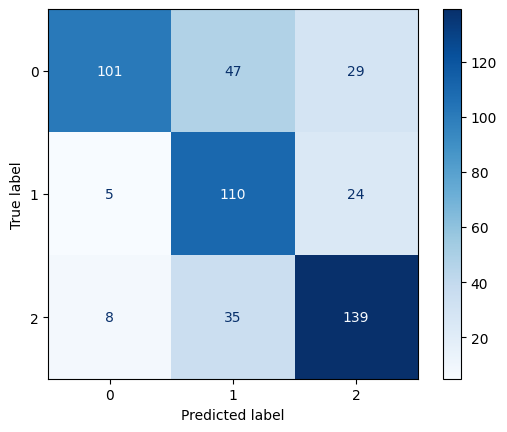

<Figure size 640x480 with 0 Axes>

In [46]:
get_analysis(test_dataset, get_sentiment_3)

TEXTBLOB
F1 Score 0.5359834169357979
Accuracy 0.5481927710843374
Recall 0.5704729567063428
VADER
F1 Score 0.7007087171995319
Accuracy 0.7028112449799196
Recall 0.7085748797125458


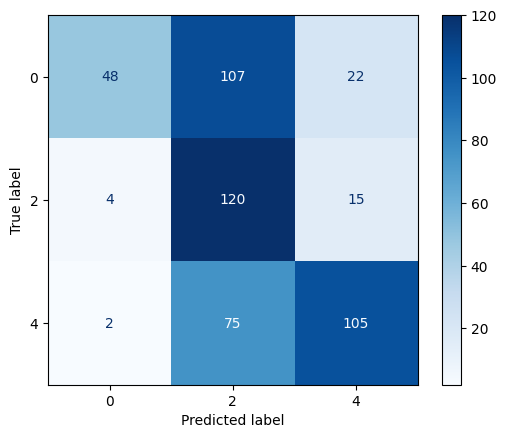

<Figure size 640x480 with 0 Axes>

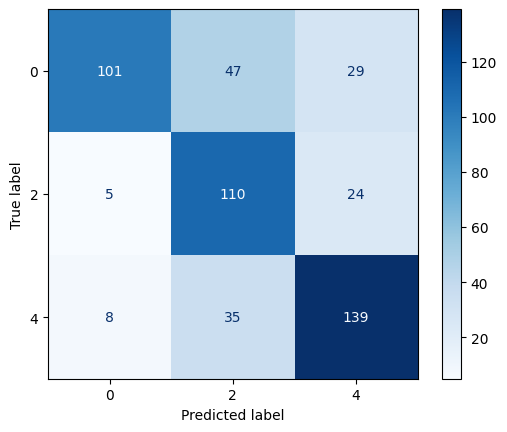

<Figure size 640x480 with 0 Axes>

In [47]:
# Dla basic_tweets_dataset
get_analysis(test_dataset, get_sentiment_3, labels=[0,2,4])

## Podział na 2 klasy

TEXTBLOB
F1 Score 0.5725824572313792
Accuracy 0.6089525
Recall 0.6089525
VADER
F1 Score 0.6413666273665359
Accuracy 0.661456875
Recall 0.661456875


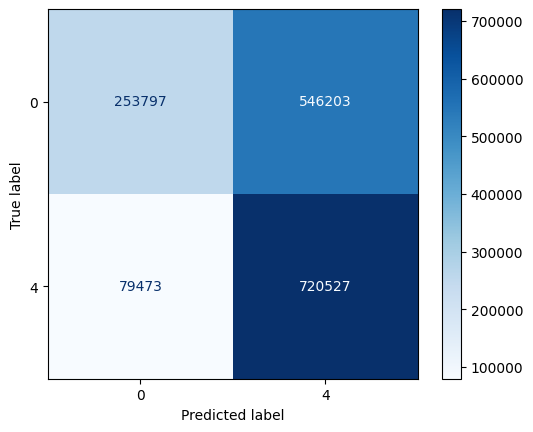

<Figure size 640x480 with 0 Axes>

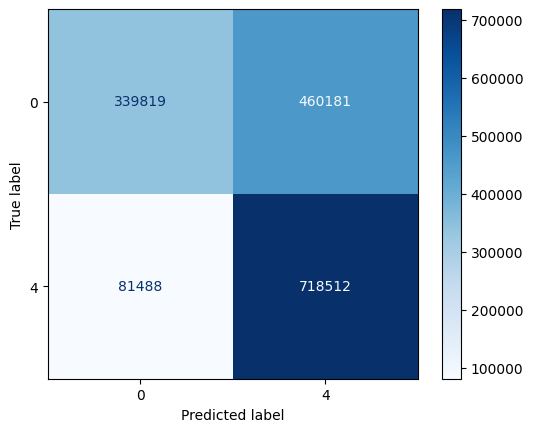

<Figure size 640x480 with 0 Axes>

In [48]:
get_analysis(train_dataset, get_sentiment_2, labels=[0,4])

TEXTBLOB
F1 Score 0.39697378644747067
Accuracy 0.5100401606425703
Recall 0.46965087643053743
VADER
F1 Score 0.44940406178938286
Accuracy 0.5682730923694779
Recall 0.5241613377206598


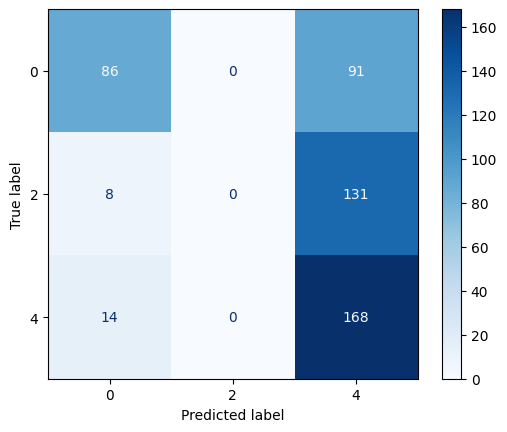

<Figure size 640x480 with 0 Axes>

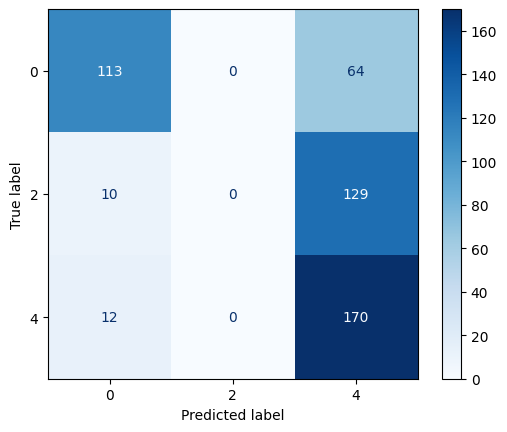

<Figure size 640x480 with 0 Axes>

In [26]:
get_analysis(test_dataset, get_sentiment_2, labels=[0,4])

In [ ]:
# print("TEST")
# print("train dataset")
# print(f"{'Text':<40} | {'TextBlob':>10} | {'VADER':>10}")
# print("-" * 70)

# for i in range(5):
#     text = train_dataset.text[i]
#     if not isinstance(text, str):
#         continue
#     tb_score = analyze_with_textblob(text)
#     vader_score = analyze_with_vader(text, vader)
#     print(f"{text[:38]:<40} | {tb_score:10.3f} | {vader_score:10.3f}")
# print("\ntest dataset")
# print(f"{'Text':<40} | {'TextBlob':>10} | {'VADER':>10}")
# print("-" * 70)

# for i in range(5):
#     text = test_dataset.text[i]
#     if not isinstance(text, str):
#         continue
#     tb_score = analyze_with_textblob(text)
#     vader_score = analyze_with_vader(text, vader)
#     print(f"{text[:38]:<40} | {tb_score:10.3f} | {vader_score:10.3f}")
